In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from matplotlib.pyplot import cm
import warnings
warnings.filterwarnings("ignore", module="matplotlib")

In [2]:
def load(path):
    with open(path, 'rb') as handle:
        data = pickle.load(handle)
    return data

In [6]:
df = load(r'\\10.224.186.68\AD-Shared\F360\Tools\LogSets\FullSet\fullset_dropped_comps.pickle')
names = df['path']
df = df.drop('path', axis=1)

In [7]:
df

,mean_num_objs,max_num_objs,mean_num_moving_objs,max_num_moving_objs,mean_num_stat_objs,max_num_stat_objs,mean_num_stat_movable_objs,max_num_stat_movable_objs,num_unique_objs/log_length,num_unique_moving_objs/log_length,...,min_num_of_General_on_road_object_detected,mean_num_of_General_on_road_object_detected,max_num_of_General_on_road_object_detected,min_num_of_Bicycle,mean_num_of_Bicycle,max_num_of_Bicycle,num_host_overtaking_moving_target_lifetime>50,num_host_overtaking_moving_target_lifetime<25,num_target_overtaking_host_lifetime>50,num_target_overtaking_host_lifetime<25
0,97.487469,125.0,0.047619,1.0,97.439850,125.0,0.020050,1.0,1.102757,0.001253,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,118.663772,125.0,0.854839,17.0,117.808933,125.0,0.540943,2.0,1.032258,0.040943,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,65.0,0.0
2,119.432298,125.0,11.874534,18.0,107.557764,117.0,0.191304,2.0,0.372671,0.116770,...,0.0,0.0,0.0,0.0,0.0,0.0,41.0,0.0,31.0,0.0
3,122.450249,125.0,11.574627,16.0,110.875622,118.0,0.202736,3.0,0.446517,0.110697,...,0.0,0.0,0.0,0.0,0.0,0.0,29.0,0.0,73.0,0.0
4,120.675776,125.0,9.501863,15.0,111.173913,119.0,0.127950,1.0,0.737888,0.126708,...,0.0,0.0,0.0,0.0,0.0,0.0,36.0,1.0,42.0,0.0
5,119.342857,125.0,9.350311,14.0,109.992547,119.0,0.144099,1.0,1.086957,0.116770,...,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,40.0,0.0
6,121.959006,125.0,6.219876,11.0,115.739130,122.0,0.085714,1.0,0.428571,0.060870,...,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,36.0,0.0
7,123.254658,125.0,5.724224,13.0,117.530435,121.0,0.000000,0.0,0.198758,0.057143,...,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,49.0,0.0
8,74.407453,125.0,6.660870,11.0,67.746584,117.0,0.000000,0.0,1.375155,0.064596,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,25.0,0.0
9,55.166253,102.0,9.748139,15.0,45.418114,91.0,0.305211,3.0,1.362283,0.085608,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,0.0


In [8]:

# Separating out the target
y = names.values
# Standardizing the features
x = StandardScaler().fit_transform(df)

In [10]:
y

array(['\\\\10.224.186.68\\AD-Shared\\F360\\Logs\\Marcel_Vaf_Logs_20190228\\6p0_Marcel\\6p0_Marcel\\rRf360t4000304v202r1/V6P0_Marcel_1_20190228_140719_001_rRf360t4000304v202r1p50_MUDP_Extracted.pickle',
       '\\\\10.224.186.68\\AD-Shared\\F360\\Logs\\Marcel_Vaf_Logs_20190228\\6p0_Marcel\\6p0_Marcel\\rRf360t4000304v202r1/V6P0_Marcel_1_20190228_140719_002_rRf360t4000304v202r1p50_MUDP_Extracted.pickle',
       '\\\\10.224.186.68\\AD-Shared\\F360\\Logs\\Marcel_Vaf_Logs_20190228\\6p0_Marcel\\6p0_Marcel\\rRf360t4000304v202r1/V6P0_Marcel_1_20190228_140719_003_rRf360t4000304v202r1p50_MUDP_Extracted.pickle',
       '\\\\10.224.186.68\\AD-Shared\\F360\\Logs\\Marcel_Vaf_Logs_20190228\\6p0_Marcel\\6p0_Marcel\\rRf360t4000304v202r1/V6P0_Marcel_1_20190228_140719_004_rRf360t4000304v202r1p50_MUDP_Extracted.pickle',
       '\\\\10.224.186.68\\AD-Shared\\F360\\Logs\\Marcel_Vaf_Logs_20190228\\6p0_Marcel\\6p0_Marcel\\rRf360t4000304v202r1/V6P0_Marcel_1_20190228_140719_005_rRf360t4000304v202r1p50_MUDP_Extr

In [36]:
n_components = 15
columns = list()
for c in range(n_components):
    columns.append('PC' + str(c))

In [38]:

pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = columns)

In [39]:
ratio = pca.explained_variance_ratio_
ratio.shape
pd.DataFrame(ratio, index=principalDf.columns).T

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,0.36803,0.128177,0.111024,0.043762,0.031813,0.029189,0.021698,0.020077,0.017345,0.015008,0.014534,0.013165,0.011694,0.010642,0.010289


In [40]:
# remaining information
sum(pca.explained_variance_ratio_)

0.8464464052201056

In [41]:
componenets = pca.components_
df_comp = pd.DataFrame(abs(componenets), columns=df.columns, index=columns).T

In [42]:
df_comp.sort_values(by=['PC1'], axis=0, inplace=True, ascending=False)

In [43]:
df_comp

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
mean_movable_objs_speed_spread,3.417215e-02,1.851178e-01,9.562557e-02,5.056122e-02,4.776525e-02,6.763427e-02,2.188581e-03,2.327277e-02,8.123009e-02,1.405229e-02,3.270551e-02,6.722177e-02,8.916605e-02,1.101811e-01,2.268766e-02
num_unique_objs_lifetime<5,3.060098e-02,1.710369e-01,1.307468e-01,1.370368e-01,6.348895e-02,1.548645e-02,3.130945e-02,6.466462e-02,1.958984e-01,1.259517e-02,7.761471e-02,1.148819e-01,1.613051e-02,1.689409e-02,1.798195e-03
num_unique_stationary_objs/log_length,1.683220e-03,1.691199e-01,1.472270e-01,1.649021e-01,2.560531e-02,7.123069e-02,2.986813e-03,8.619416e-02,1.683485e-01,1.839493e-03,8.630938e-02,7.429107e-02,3.154852e-02,3.829752e-03,2.443929e-02
num_unique_objs_lifetime<10,4.337797e-02,1.683585e-01,1.263969e-01,1.463007e-01,5.258394e-02,1.956070e-02,3.955738e-02,4.905828e-02,1.986456e-01,3.634420e-03,3.546319e-02,9.068537e-02,1.840606e-02,2.348630e-02,4.617427e-03
mean_num_moving_objs,9.602834e-02,1.630430e-01,6.225927e-02,2.959297e-02,4.193828e-02,6.357572e-02,7.727063e-02,4.572817e-02,5.508620e-02,6.157138e-02,8.601921e-02,2.015563e-02,6.513647e-02,2.624542e-02,2.618357e-02
num_unique_objs/log_length,9.905174e-03,1.618078e-01,1.595055e-01,1.648052e-01,3.834074e-02,5.838658e-02,2.885655e-03,7.934283e-02,1.623693e-01,2.408210e-03,8.178479e-02,6.888596e-02,2.756622e-02,1.642981e-03,3.163085e-02
mean_num_movable_unique_objs_conf_lvl_0.3-0.5,8.592774e-02,1.597182e-01,7.916053e-02,4.916566e-02,7.617511e-02,1.205508e-02,3.350469e-02,2.379814e-02,6.417349e-02,9.411486e-03,1.024449e-02,5.291843e-02,1.978243e-02,2.982193e-02,1.331163e-01
num_unique_objs_lifetime<25,3.256706e-02,1.587677e-01,1.536804e-01,1.434035e-01,4.950304e-02,1.027428e-02,4.639401e-02,4.972163e-02,1.906519e-01,1.852400e-02,4.144698e-02,5.241409e-02,9.701708e-03,2.948760e-02,9.588047e-03
max_num_moving_objs,9.789465e-02,1.567106e-01,4.384061e-02,5.979745e-02,9.436474e-02,1.187987e-02,7.896017e-02,4.921808e-02,2.021833e-02,4.408358e-04,4.494260e-02,3.902056e-02,2.349481e-02,7.071414e-03,5.520973e-02
mean_num_of_Car,9.030361e-02,1.547275e-01,8.863404e-02,1.430184e-02,5.465935e-02,1.092554e-01,4.338710e-02,6.427518e-02,7.833074e-02,1.912516e-02,6.900073e-02,6.017115e-02,1.144312e-02,1.661526e-02,3.043770e-02


In [44]:
corrmat = pca.get_covariance()
corrmat = pd.DataFrame(corrmat, columns=df.columns, index=df.columns)

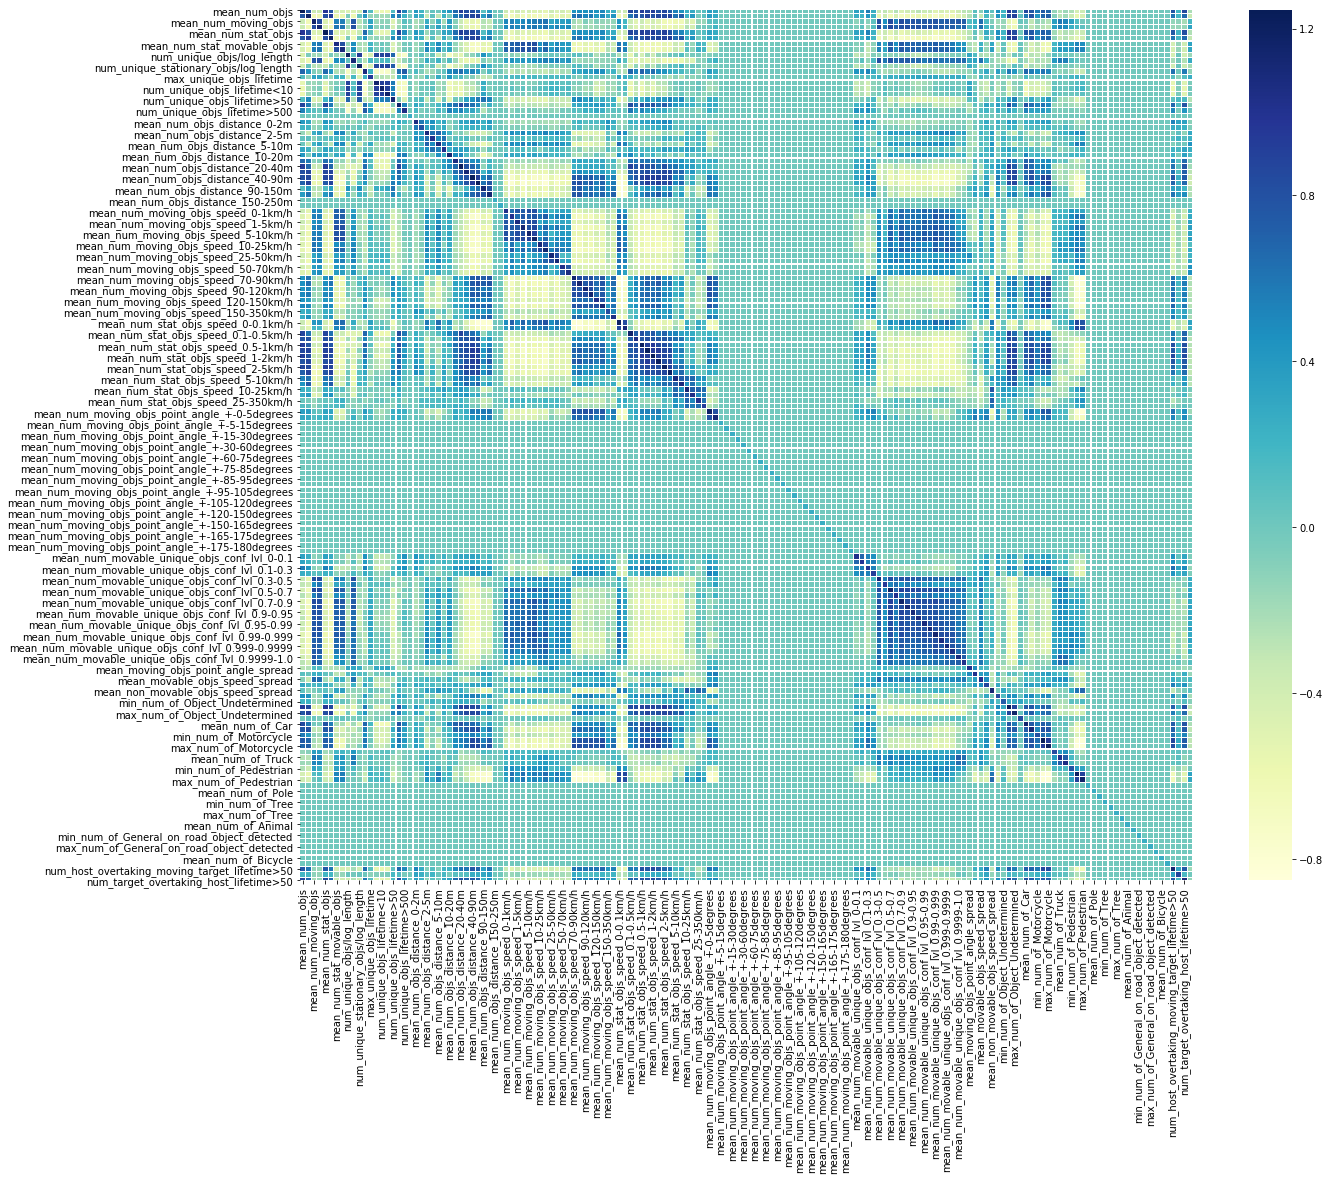

In [45]:
f, ax = plt.subplots(figsize =(20, 16)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

In [7]:
# principalDf

,PC1,PC2,PC3
0,-1.442108,4.655424,-0.708275
1,-0.746110,2.651550,0.670601
2,3.509568,-0.423064,1.023259
3,3.732382,-0.742163,-0.517308
4,3.947709,0.020575,0.286958
5,3.614989,-0.200341,0.506089
6,2.566566,0.177850,2.529228
7,2.582625,0.676567,2.246367
8,3.701225,-0.724006,0.644099
9,4.197678,-3.967598,0.311097


In [8]:
# finalDf = pd.concat([principalDf, names], axis = 1)

In [9]:
# finalDf

,PC1,PC2,PC3,name
0,-1.442108,4.655424,-0.708275,V6P0_Marcel_1_20190228_140719_001_rRf360t40003...
1,-0.746110,2.651550,0.670601,V6P0_Marcel_1_20190228_140719_002_rRf360t40003...
2,3.509568,-0.423064,1.023259,V6P0_Marcel_1_20190228_140719_003_rRf360t40003...
3,3.732382,-0.742163,-0.517308,V6P0_Marcel_1_20190228_140719_004_rRf360t40003...
4,3.947709,0.020575,0.286958,V6P0_Marcel_1_20190228_140719_005_rRf360t40003...
5,3.614989,-0.200341,0.506089,V6P0_Marcel_1_20190228_140719_006_rRf360t40003...
6,2.566566,0.177850,2.529228,V6P0_Marcel_1_20190228_140719_007_rRf360t40003...
7,2.582625,0.676567,2.246367,V6P0_Marcel_1_20190228_140719_008_rRf360t40003...
8,3.701225,-0.724006,0.644099,V6P0_Marcel_1_20190228_140719_009_rRf360t40003...
9,4.197678,-3.967598,0.311097,V6P0_Marcel_1_20190228_140719_010_rRf360t40003...


In [46]:
# Initializing KMeans
kmeans = KMeans(n_clusters=10)
# Fitting with inputs
X = principalDf.to_numpy()
kmeans = kmeans.fit(X)
# Predicting the clusters
labels_clustering = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

In [98]:
c_df = pd.DataFrame(labels_clustering, columns=['cluster'])
cluster_count = c_df.groupby('cluster')['cluster'].count().to_dict()
n_logs = 20
y = {}
clusters = {}
n_clusters = 10
data = pd.DataFrame()

In [100]:
for c in range(n_clusters):
    n_logs_from_cluster = cluster_count[c] / 85 * n_logs
    clusters[c] = c_df[c_df['cluster'] == int(c)].index.to_numpy()
    if n_logs_from_cluster < 1:
        y[c] = np.ceil(n_logs_from_cluster)
    else:
        y[c] = np.rint(n_logs_from_cluster)   
    i = np.random.choice(c_df[c_df['cluster'] == c].index.to_numpy(), int(y[c]))
    data = data.append(df.iloc[i, :])

In [101]:
data

,mean_num_objs,max_num_objs,mean_num_moving_objs,max_num_moving_objs,mean_num_stat_objs,max_num_stat_objs,mean_num_stat_movable_objs,max_num_stat_movable_objs,num_unique_objs/log_length,num_unique_moving_objs/log_length,...,min_num_of_General_on_road_object_detected,mean_num_of_General_on_road_object_detected,max_num_of_General_on_road_object_detected,min_num_of_Bicycle,mean_num_of_Bicycle,max_num_of_Bicycle,num_host_overtaking_moving_target_lifetime>50,num_host_overtaking_moving_target_lifetime<25,num_target_overtaking_host_lifetime>50,num_target_overtaking_host_lifetime<25
56,71.881988,83.0,11.567702,15.0,60.314286,71.0,0.290683,1.0,1.209938,0.095652,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0
51,72.483230,85.0,2.316770,10.0,70.166460,83.0,2.395031,6.0,0.736646,0.058385,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0
5,119.342857,125.0,9.350311,14.0,109.992547,119.0,0.144099,1.0,1.086957,0.116770,...,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,40.0,0.0
2,119.432298,125.0,11.874534,18.0,107.557764,117.0,0.191304,2.0,0.372671,0.116770,...,0.0,0.0,0.0,0.0,0.0,0.0,41.0,0.0,31.0,0.0
9,55.166253,102.0,9.748139,15.0,45.418114,91.0,0.305211,3.0,1.362283,0.085608,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,0.0
22,64.584367,87.0,7.171216,14.0,57.413151,79.0,0.000000,0.0,1.468983,0.125310,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
38,79.643478,110.0,6.238509,15.0,73.404969,103.0,2.768944,7.0,1.496894,0.104348,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64,64.237267,83.0,12.231056,18.0,52.006211,68.0,3.949068,10.0,1.029814,0.136646,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0
59,69.847015,86.0,13.500000,22.0,56.347015,72.0,6.931592,15.0,1.016169,0.152985,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0
59,69.847015,86.0,13.500000,22.0,56.347015,72.0,6.931592,15.0,1.016169,0.152985,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0


In [79]:
clusters

{0: array([44, 51, 52, 56, 73, 74, 78], dtype=int64),
 1: array([ 2,  3,  4,  5,  6,  7, 30, 31, 32, 33], dtype=int64),
 2: array([ 9, 10, 11, 12, 21, 22, 23, 37], dtype=int64),
 3: array([14, 15, 38, 39, 40], dtype=int64),
 4: array([41, 49, 50, 53, 54, 55, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 77, 79, 80, 81, 82, 83, 84], dtype=int64),
 5: array([ 8, 13, 19, 20, 24, 35, 36], dtype=int64),
 6: array([25, 26, 27, 28, 29, 34], dtype=int64),
 7: array([ 0, 16, 17], dtype=int64),
 8: array([ 1, 18], dtype=int64),
 9: array([42, 43, 45, 46, 47, 48, 57, 75, 76], dtype=int64)}

In [67]:
c_df.groupby('cluster')['cluster'].count().to_dict()

{0: 7, 1: 10, 2: 8, 3: 5, 4: 28, 5: 7, 6: 6, 7: 3, 8: 2, 9: 9}

<Figure size 432x288 with 0 Axes>

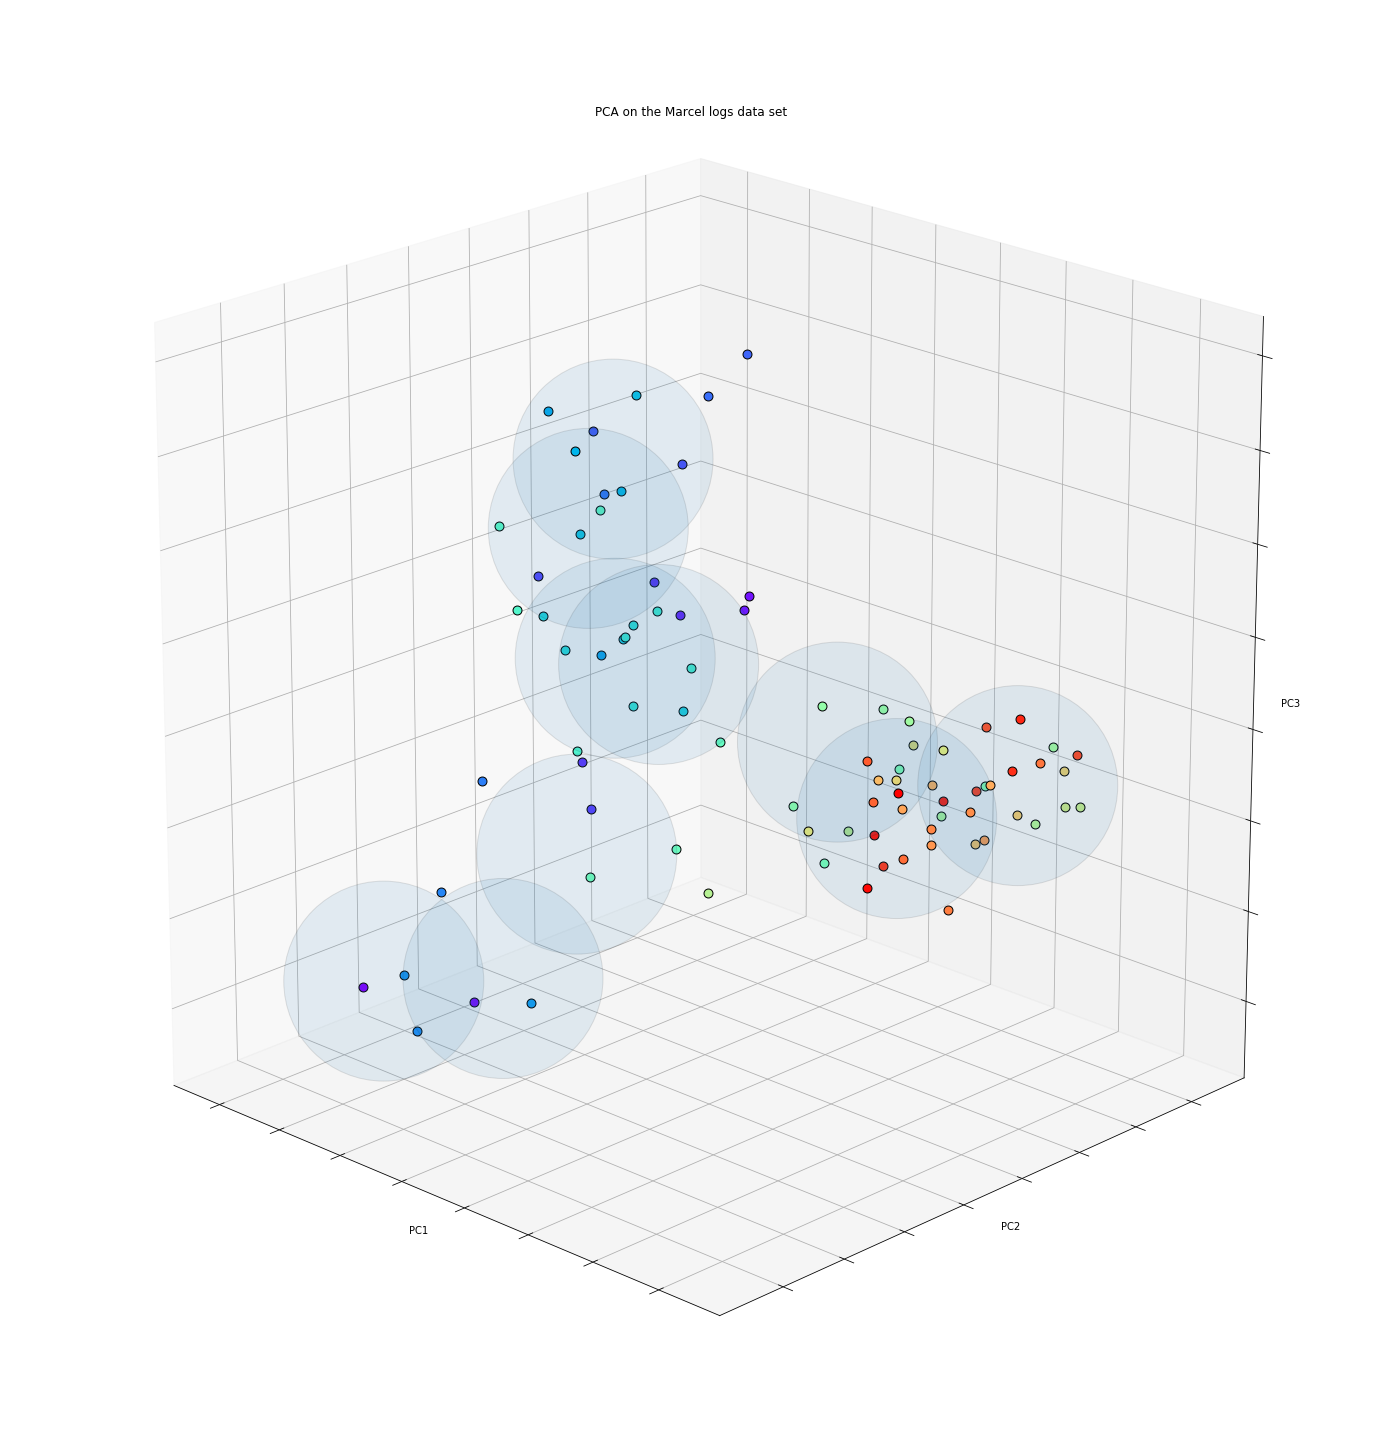

In [47]:
plt.clf()

fig = plt.figure(figsize=(20, 20))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=134)

plt.cla()
features = principalComponents

colors=list(cm.rainbow(np.linspace(0,1,df.shape[0])))

targets = names.to_list()
for i, name in enumerate(targets):
    ax.scatter(features[i, 0], features[i, 1], features[i, 2], c=[colors[i]], edgecolor='k', cmap="Set2_r", s=80)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the Marcel logs data set")
# ax.legend(list(names))
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='o', edgecolor='k', s=40000, alpha=0.1)
# plt.show()

In [52]:


# Initializing KMeans
kmeans = KMeans(n_clusters=10)
# Fitting with inputs
X = principalDf.to_numpy()
kmeans = kmeans.fit(X)
# Predicting the clusters
labels_clustering = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

In [55]:
labels_clustering

array([7, 8, 1, 1, 1, 1, 1, 1, 5, 2, 2, 2, 2, 5, 3, 3, 7, 7, 8, 5, 5, 2,
       2, 2, 5, 6, 6, 6, 6, 6, 1, 1, 1, 1, 6, 5, 5, 2, 3, 3, 3, 4, 9, 9,
       0, 9, 9, 9, 9, 4, 4, 0, 0, 4, 4, 4, 0, 9, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 0, 0, 9, 9, 4, 0, 4, 4, 4, 4, 4, 4])

Text(0.5, 0.92, 'PCA on the Marcel logs data set')

<Figure size 432x288 with 0 Axes>

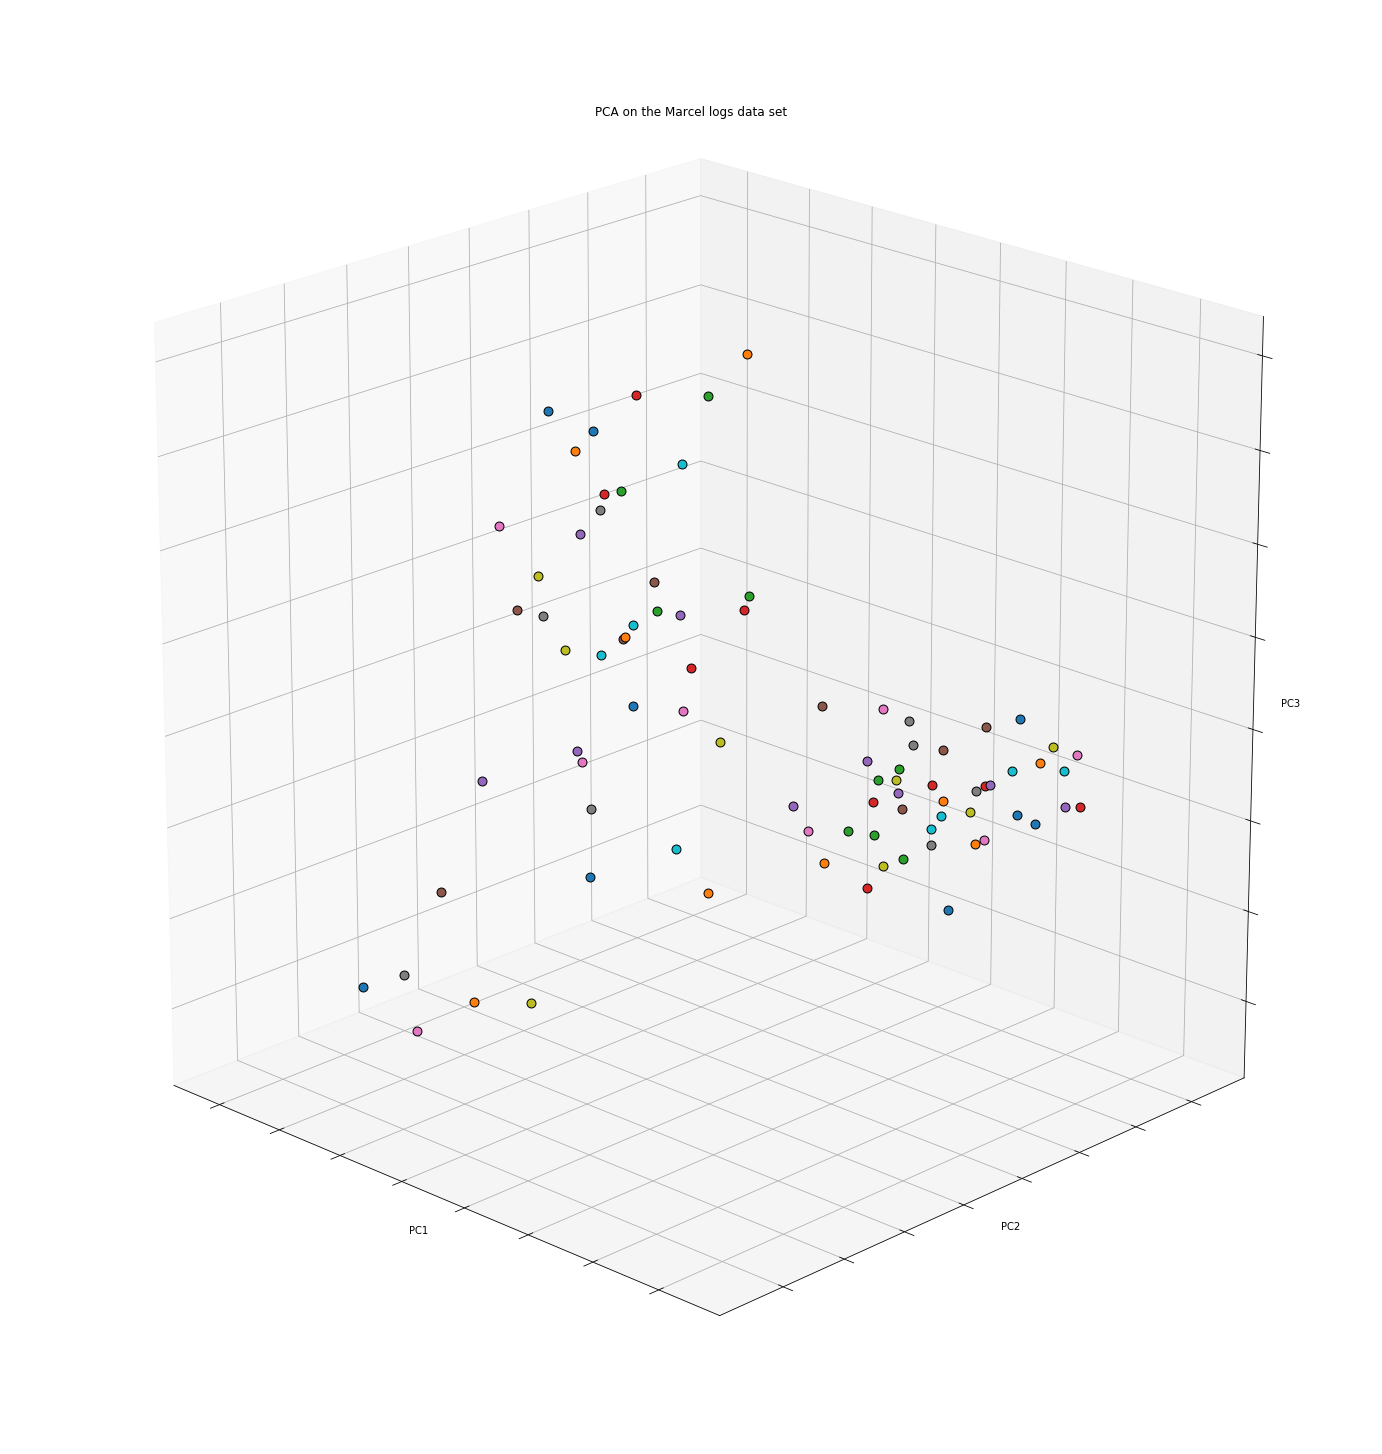

In [53]:
plt.clf()

fig = plt.figure(figsize=(20, 20))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=134)

plt.cla()
features = principalComponents

# colors=list(cm.rainbow(np.linspace(0,1,df.shape[0])))

targets = names.to_list()
for i, name in enumerate(targets):
    ax.scatter(features[i, 0], features[i, 1], features[i, 2],  edgecolor='k', cmap="Set2_r", s=80)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the Marcel logs data set")
# ax.legend(list(names))
# ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='o', edgecolor='k', s=40000, alpha=0.1)
# plt.show()